# Random Forest Regression

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [20]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from datetime import time

Loading and Cleaning Data

In [21]:
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second
df = pd.read_csv("data.csv")
# Drop columns
df = df.drop("date", axis=1)
# Center timestamp
noon = time_to_seconds(time(12, 0, 0))
df.timestamp = df.timestamp.apply(lambda t: abs(noon - t))
# one hot encode categorical columns
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head()

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,18011,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,19214,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,19815,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,20416,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,21017,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Data Description

The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

Label:
Number of people

Features:

date (string; datetime of data)<br>
timestamp (int; number of seconds since beginning of day) <br>
day_of_week (int; 0 [monday] - 6 [sunday]) <br>
is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0] <br>
is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise] <br>
temperature (float; degrees fahrenheit) <br>
is_start_of_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise] <br>
month (int; 1 [jan] - 12 [dec]) <br>
hour (int; 0 - 23)<br>

In [22]:
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
hf = df.columns
hf[1:]

Index(['timestamp', 'is_weekend', 'is_holiday', 'temperature',
       'is_start_of_semester', 'is_during_semester', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23'],
      dtype='object')

In [23]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

C:\Python36\Lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
print("Linear Regression train score:",lr.score(X_train,y_train))
print("Linear Regression test score:",lr.score(X_test,y_test))
print("Random Forest Regression train score:",rf.score(X_train,y_train))
print("Random Forest Regression test score:",rf.score(X_test,y_test))

Linear Regression train score: 0.6262137629538037
Linear Regression test score: 0.6296032322315213
Random Forest Regression train score: 0.9820677281280287
Random Forest Regression test score: 0.9065469617730593


## Parameter Description

__bootstrap__ : boolean, optional (default=True) <br>
Whether bootstrap samples are used when building trees.

__criterion__ : string, optional (default=”mse”) <br>
The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.

__max_depth__ : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

__min_samples_split__ : int, float, optional (default=2)
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

__min_samples_leaf__ : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

__min_weight_fraction_leaf__ : float, optional (default=0.)
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

__max_features__ : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=n_features.
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

__max_leaf_nodes__ : int or None, optional (default=None)
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

__min_impurity_decrease__ : float, optional (default=0.)
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

__min_impurity_split__ : float, (default=1e-7)
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

__oob_score__ : bool, optional (default=False)
whether to use out-of-bag samples to estimate the R^2 on unseen data.

__n_jobs__ : int or None, optional (default=None)
The number of jobs to run in parallel for both fit and predict.

__random_state__ : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

__verbose__ : int, optional (default=0)
Controls the verbosity when fitting and predicting.

__warm_start__ : bool, optional (default=False)
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

In [49]:
rf = RandomForestRegressor(n_estimators=10,max_depth=3,oob_score=True)
rf.fit(X_train,y_train)
print("Random Forest Regression train score:",rf.score(X_train,y_train))
print("Random Forest Regression test score:",rf.score(X_test,y_test))

Random Forest Regression train score: 0.26187685592244814
Random Forest Regression test score: 0.27120932174993606


C:\Python36\Lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


### Visualizing the tree

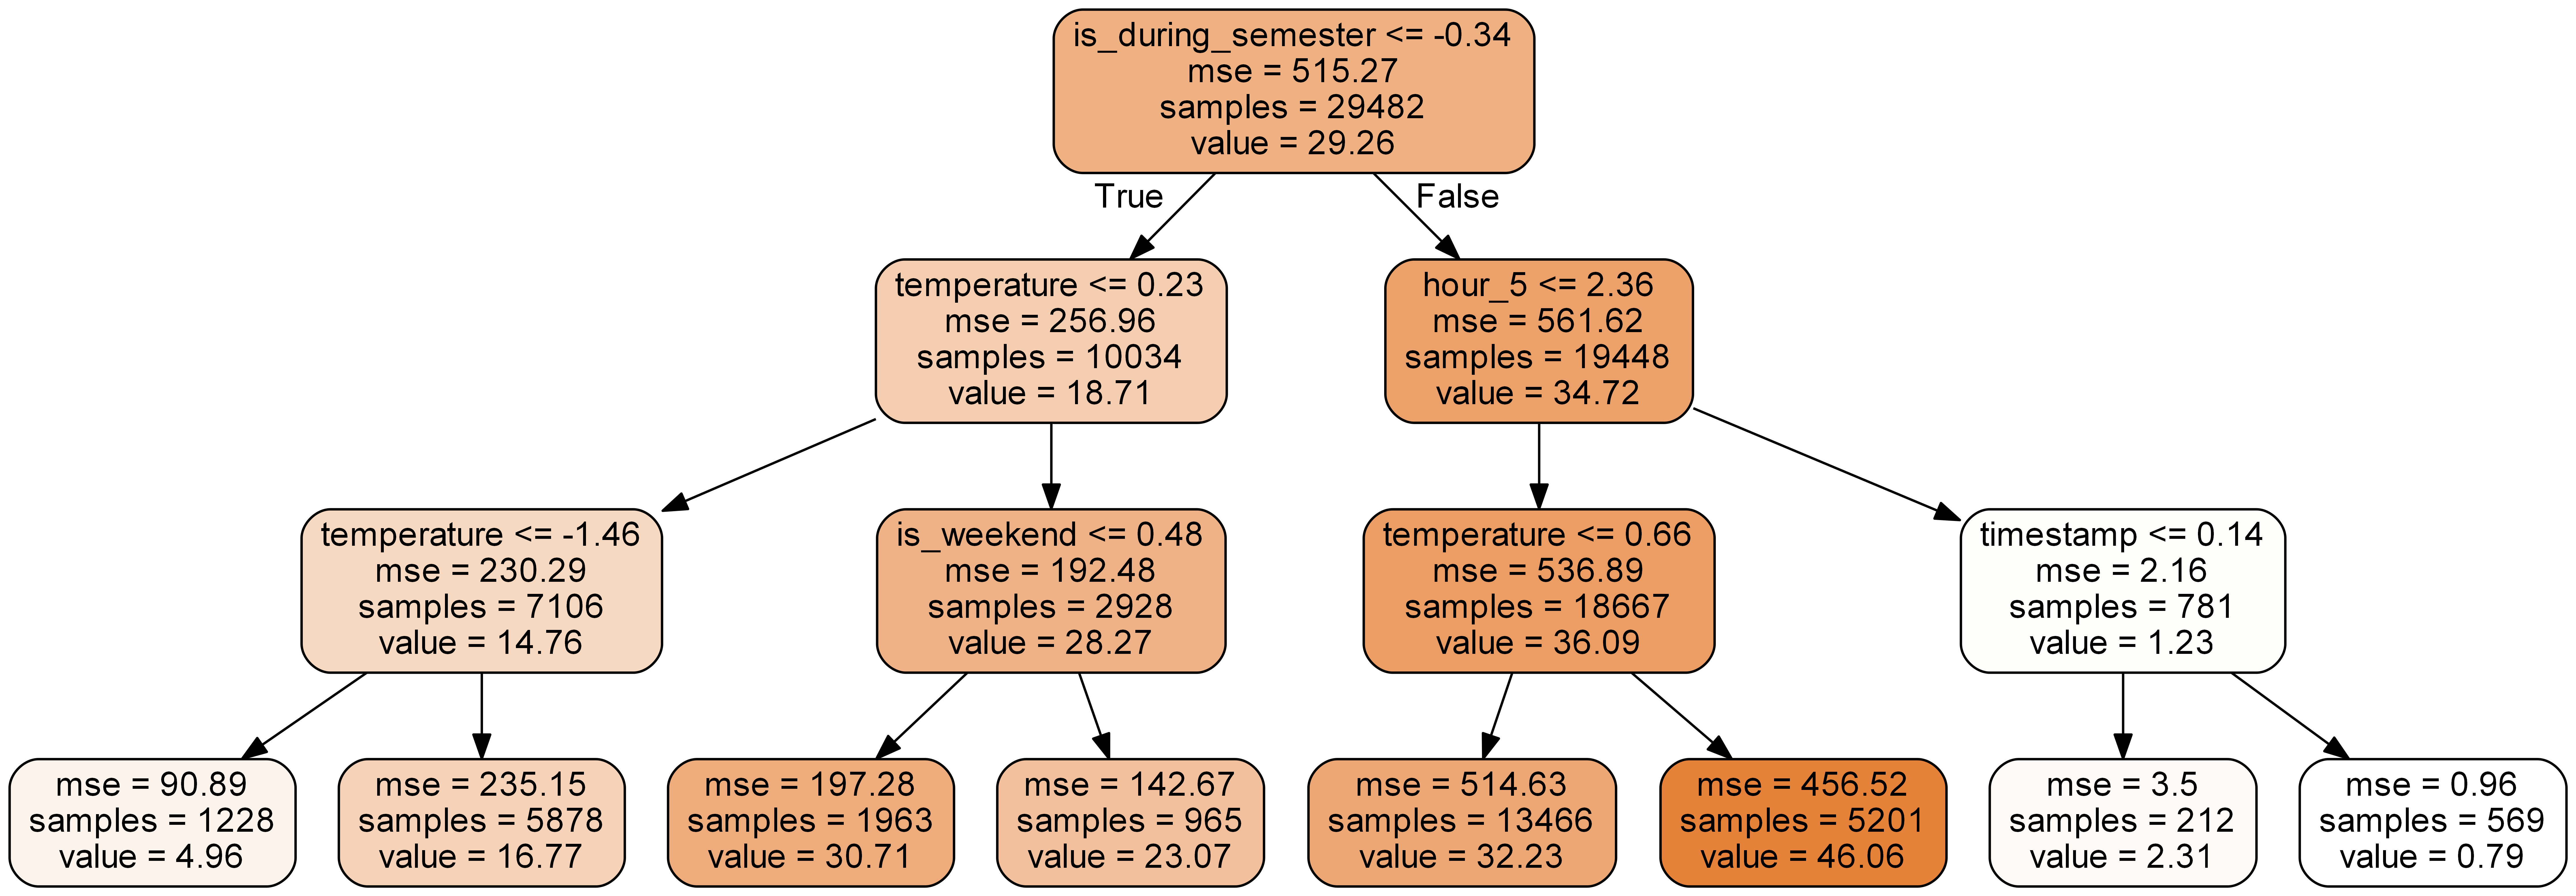

In [54]:
estimator = rf.estimators_[8]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree1.dot', 
                feature_names = hf[1:],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

Plotting test score with increasing n_estimators value

In [18]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10,200,10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n,max_depth = 28,min_samples_split=3)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

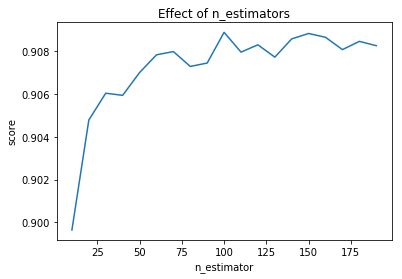

In [19]:
plt.show()

Reference - https://www.kaggle.com/nsrose7224/random-forest-regressor-accuracy-0-91/data<br>
 https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c